<div class="alert alert-danger" role="alert">
<h1 align="center"><font size = 14>LogisticRegression</font></h1>
<h4 align="center">September 21-2024<h4>
<h3 align="center">Armin Amani</h3>

<div class="alert alert-danger" role="alert">
📤 Import Libraries

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import copy

<div class="alert alert-danger" role="alert"> 
💾 Data

In [21]:
x_train = np.array([[0.5,1.5],[1,1],[1.5,0.5],[3,0.5],[2,2],[1,2.5]])
y_train = np.array([0,0,0,1,1,1])

In [22]:
x_train

array([[0.5, 1.5],
       [1. , 1. ],
       [1.5, 0.5],
       [3. , 0.5],
       [2. , 2. ],
       [1. , 2.5]])

In [23]:
y_train

array([0, 0, 0, 1, 1, 1])

<div class="alert alert-danger" role="alert"> 
🔎 Plot

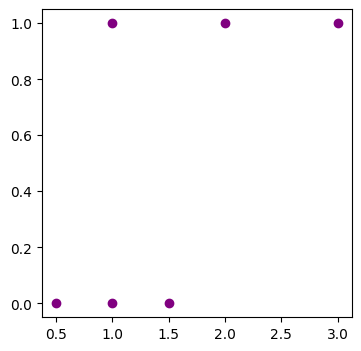

In [24]:
fig,ax = plt.subplots(1,1,figsize=(4,4))
ax.scatter(x_train[:,[0]],y_train,color='purple')
plt.show()

<div class="alert alert-danger" role="alert"> 
🔎 Sigmoid Plot

In [25]:
def Sigmoid(h_theta):
    return 1/(1+np.exp(-h_theta))

In [26]:
h_theta = np.arange(-10,11)
h_theta

array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
         3,   4,   5,   6,   7,   8,   9,  10])

In [27]:
g_h = Sigmoid(h_theta)
g_h

array([4.53978687e-05, 1.23394576e-04, 3.35350130e-04, 9.11051194e-04,
       2.47262316e-03, 6.69285092e-03, 1.79862100e-02, 4.74258732e-02,
       1.19202922e-01, 2.68941421e-01, 5.00000000e-01, 7.31058579e-01,
       8.80797078e-01, 9.52574127e-01, 9.82013790e-01, 9.93307149e-01,
       9.97527377e-01, 9.99088949e-01, 9.99664650e-01, 9.99876605e-01,
       9.99954602e-01])

In [30]:
np.set_printoptions(precision=3,formatter={'float_kind':'{:f}'.format})
print(np.c_[h_theta,g_h])

[[-10.000000 0.000045]
 [-9.000000 0.000123]
 [-8.000000 0.000335]
 [-7.000000 0.000911]
 [-6.000000 0.002473]
 [-5.000000 0.006693]
 [-4.000000 0.017986]
 [-3.000000 0.047426]
 [-2.000000 0.119203]
 [-1.000000 0.268941]
 [0.000000 0.500000]
 [1.000000 0.731059]
 [2.000000 0.880797]
 [3.000000 0.952574]
 [4.000000 0.982014]
 [5.000000 0.993307]
 [6.000000 0.997527]
 [7.000000 0.999089]
 [8.000000 0.999665]
 [9.000000 0.999877]
 [10.000000 0.999955]]


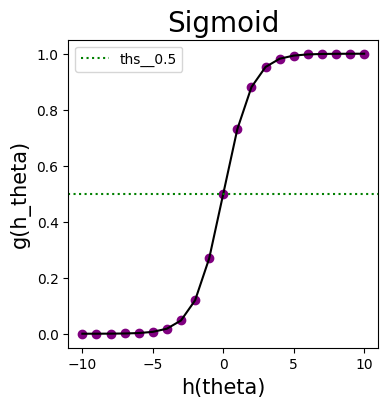

In [31]:
fig, ax = plt.subplots(1,1,figsize=(4,4))
ax.scatter(h_theta,g_h,color='purple')
ax.plot(h_theta,g_h,color='k')
ax.axhline(y=0.5,color='green',label='ths__0.5',linestyle=':')
ax.set_title('Sigmoid',fontsize=20)
ax.set_xlabel('h(theta)',fontsize=15)
ax.set_ylabel('g(h_theta)',fontsize=15)
ax.legend()
plt.show()

<div class="alert alert-danger" role="alert"> 
🔎 Sketch Loss function

In [34]:
def loss_func(x,y,theta,theta0):
    m = x.shape[0]
    loss = 0.0
    for i in  range(m):
        h_theta = np.dot(x[i],theta)+theta0
        g_h = Sigmoid(h_theta)
        loss += -y[i]*np.log(g_h)-(1-y[i])*np.log(1-g_h)
    loss = loss/m
    return loss

In [35]:
theta = np.array([0,1])
theta0 = 1.0
loss_func(x_train,y_train,theta,theta0)

1.1144970118578983

<div class="alert alert-danger" role="alert"> 
🔎 GD

In [36]:
def gradient(x,y,theta,theta0):
    m = x.shape[0]
    n = x.shape[1]

    dj_dtheta = np.zeros((n,))
    dj_dtheta0 = 0.0

    for i in  range(m):
        h_theta = Sigmoid(np.dot(x[i],theta)+theta0)
        error = h_theta - y[i]

        for j in range(n):
            dj_dtheta[j] += error * x[i,j]
        dj_dtheta0 += error
    dj_dtheta0 = dj_dtheta0/m
    dj_dtheta = dj_dtheta0/m

    return dj_dtheta,dj_dtheta0

In [37]:
theta = np.array([0,1])
theta0 = 1.0
gradient(x_train,y_train,theta,theta0)

(0.06564860406708342, 0.39389162440250053)

In [38]:
def run_gradient(x,y,alpha,n_iters,theta,theta0):
    j_history = []
    for iter in range(n_iters):
        dj_dtheta,dj_dtheta0 = gradient(x,y,theta,theta0)

        theta = theta - alpha * dj_dtheta
        theta0 = theta0 - alpha * dj_dtheta0

        loss = loss_func(x,y,theta,theta0)
        j_history.append(loss)
        print(f"iteration : {iter} ===> j(theta) : {j_history[iter]}")
    return theta,theta0,j_history

In [42]:
theta,theta0,j_history = run_gradient(x_train,y_train,alpha=0.01,n_iters=2000,theta=np.zeros((x_train.shape[1])),theta0=1.0)

iteration : 0 ===> j(theta) : 0.8126373025740917
iteration : 1 ===> j(theta) : 0.8120170162313163
iteration : 2 ===> j(theta) : 0.8114008098151709
iteration : 3 ===> j(theta) : 0.8107886646542823
iteration : 4 ===> j(theta) : 0.8101805620816492
iteration : 5 ===> j(theta) : 0.8095764834356549
iteration : 6 ===> j(theta) : 0.808976410061072
iteration : 7 ===> j(theta) : 0.808380323310056
iteration : 8 ===> j(theta) : 0.8077882045431307
iteration : 9 ===> j(theta) : 0.8072000351301646
iteration : 10 ===> j(theta) : 0.8066157964513382
iteration : 11 ===> j(theta) : 0.8060354698981009
iteration : 12 ===> j(theta) : 0.8054590368741196
iteration : 13 ===> j(theta) : 0.8048864787962177
iteration : 14 ===> j(theta) : 0.8043177770953047
iteration : 15 ===> j(theta) : 0.8037529132172967
iteration : 16 ===> j(theta) : 0.8031918686240265
iteration : 17 ===> j(theta) : 0.8026346247941448
iteration : 18 ===> j(theta) : 0.8020811632240129
iteration : 19 ===> j(theta) : 0.8015314654285834
iteration : 

In [43]:
theta

array([-0.113134, -0.113134])

In [44]:
theta0

0.3211986390106684

In [45]:
def j(theta):
    theta0 = 0.3211986390106684
    x = x_train
    y = y_train
    m = x.shape[0]
    loss = 0.0
    for i in  range(m):
        h_theta = np.dot(x[i],theta)+theta0
        g_h = Sigmoid(h_theta)
        loss += -y[i]*np.log(g_h)-(1-y[i])*np.log(1-g_h)
    loss = loss/m
    return loss

In [57]:
theta = np.array([-0.113134,-0.113134])
j(theta)

0.7414413693559146

In [47]:
from scipy.optimize import minimize

In [56]:
result = minimize(j,x0=[-0.113134,-0.113134],method='BFGS')
result

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0.692975800617965
        x: [ 2.351e-01 -6.557e-02]
      nit: 7
      jac: [ 2.295e-06 -1.922e-06]
 hess_inv: [[ 2.803e+00 -1.966e+00]
            [-1.966e+00  3.181e+00]]
     nfev: 24
     njev: 8

In [18]:
result.success

True

In [19]:
result.x

array([0.33688386, 0.04307471])

<div class="alert alert-danger" role="alert"> 
🔎 Part2

<div class="alert alert-danger" role="alert">
📤 Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

<div class="alert alert-danger" role="alert"> 
💾 Read CSV File

In [2]:
df = pd.read_csv('Breast_Cancer.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
df = df.drop(['Unnamed: 32','id'],axis=1)
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

<div class="alert alert-danger" role="alert"> 
🔎 Data Visualize

In [9]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

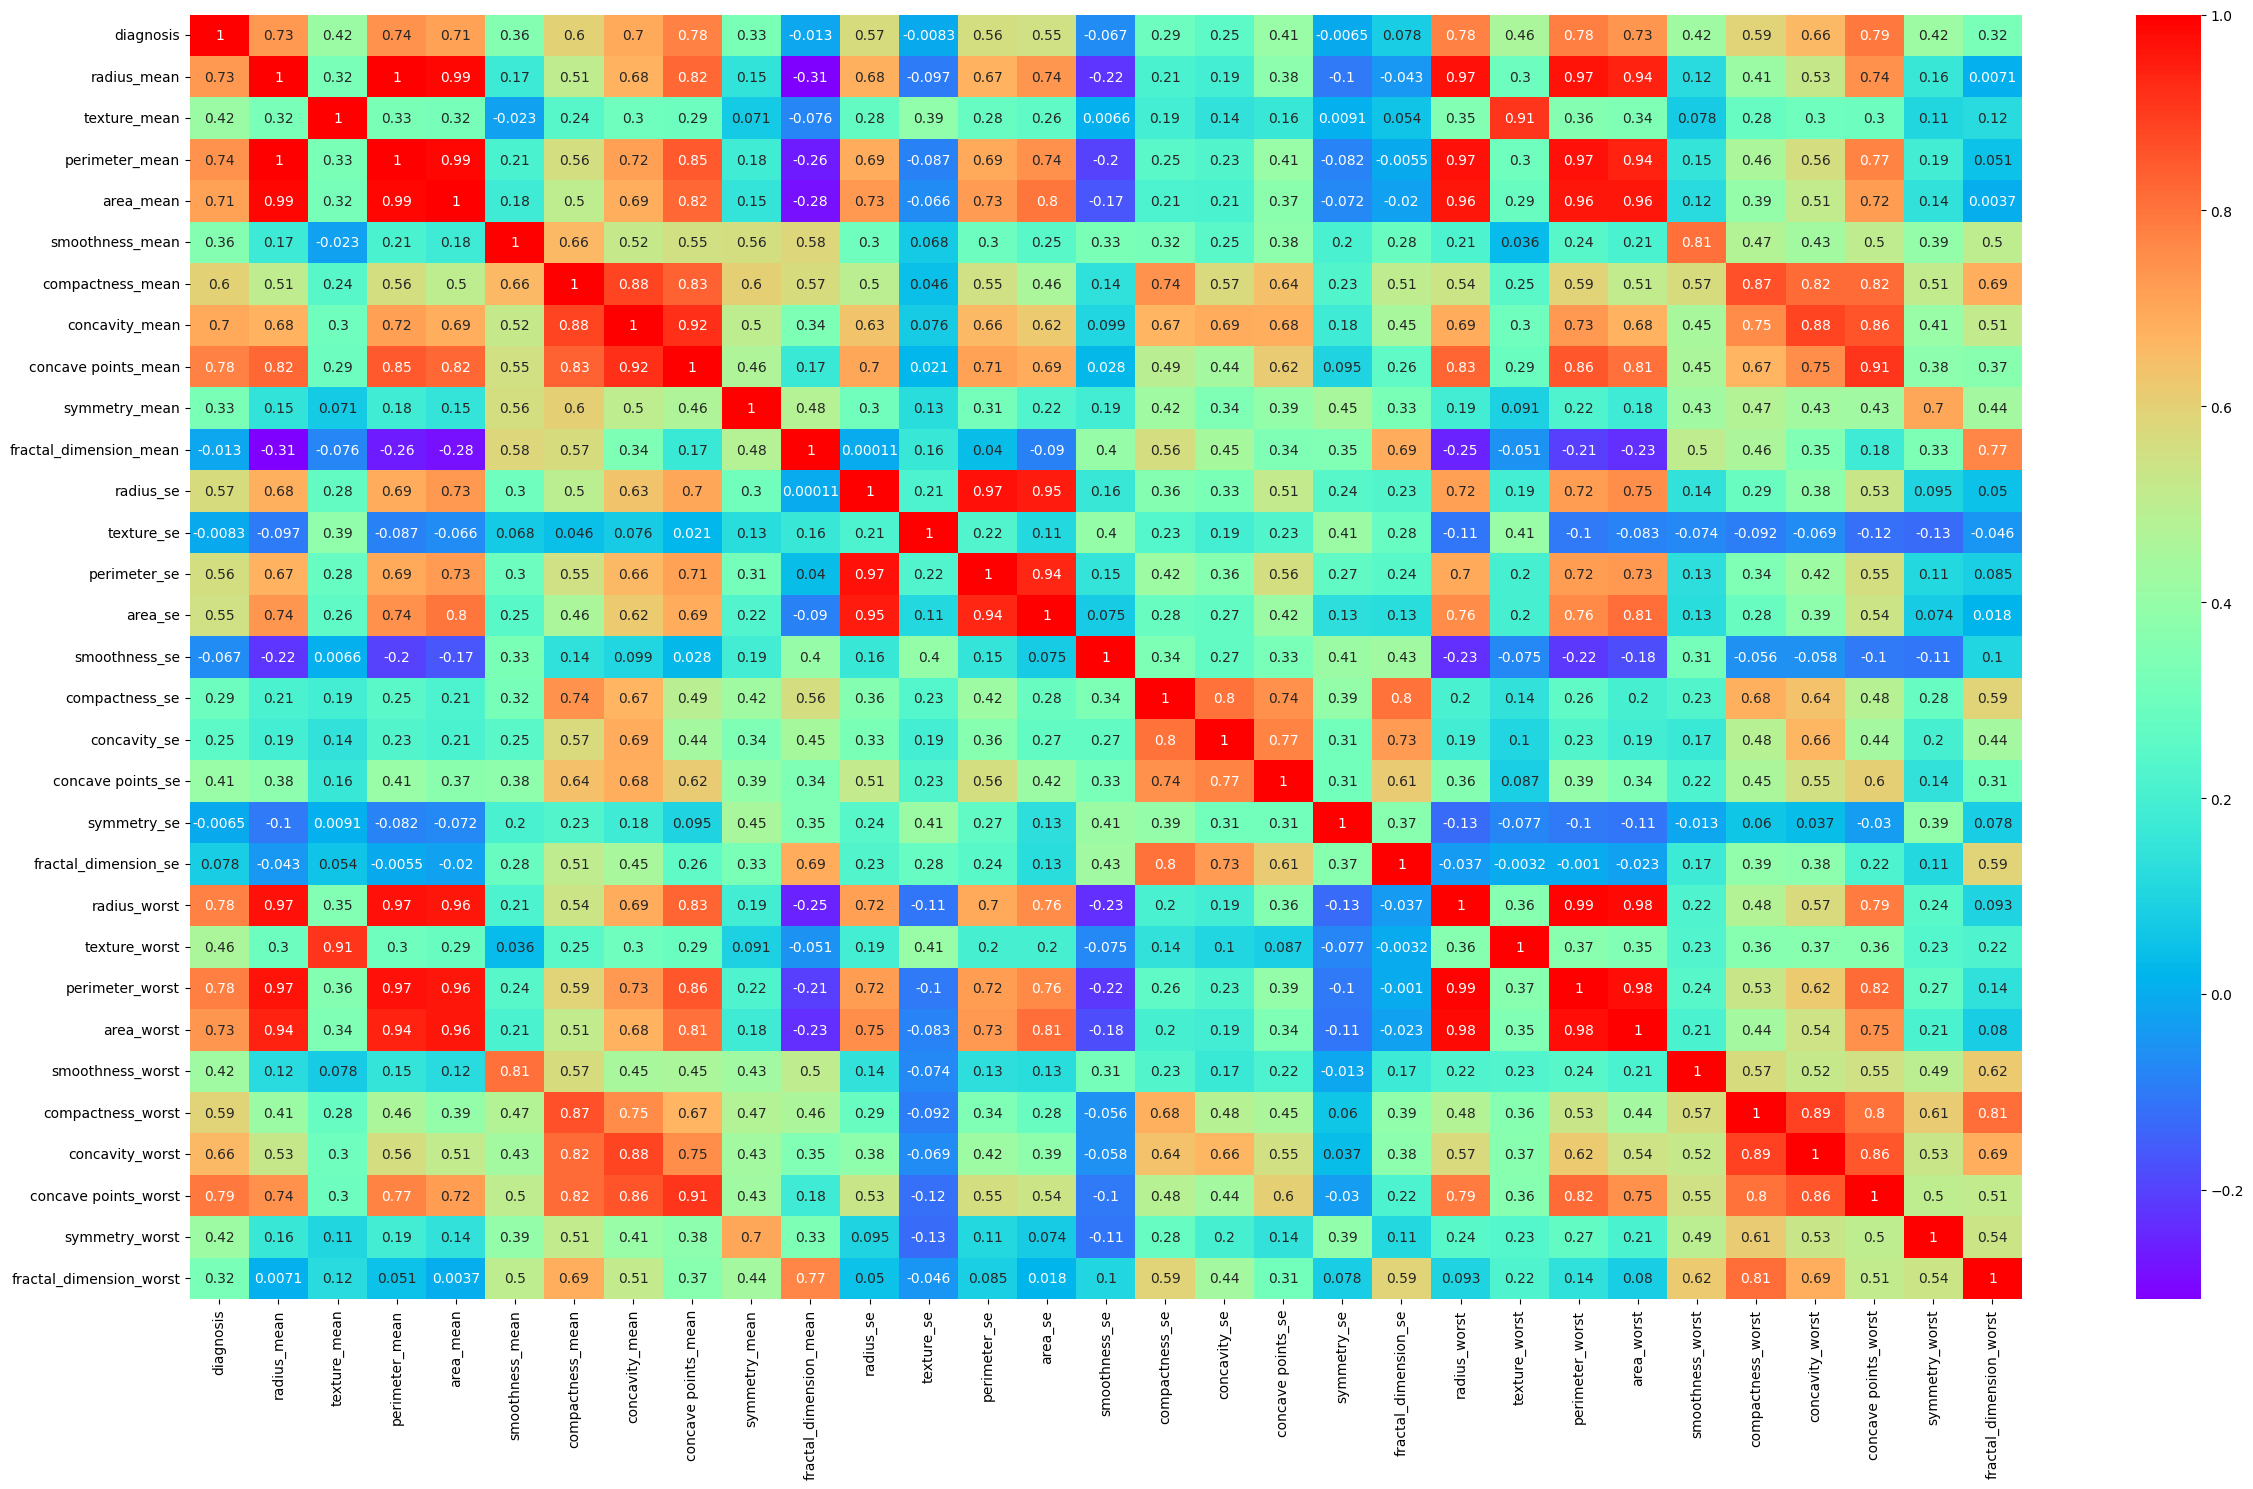

In [15]:
fig = plt.figure(figsize=(25,15))
sns.heatmap(df.corr(),annot=True,cmap=plt.cm.rainbow)
fig.tight_layout()

In [18]:
c = df['diagnosis'].value_counts()
c

diagnosis
0    357
1    212
Name: count, dtype: int64

c:\Users\Beethoven\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Beethoven\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Beethoven\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='diagnosis', ylabel='count'>

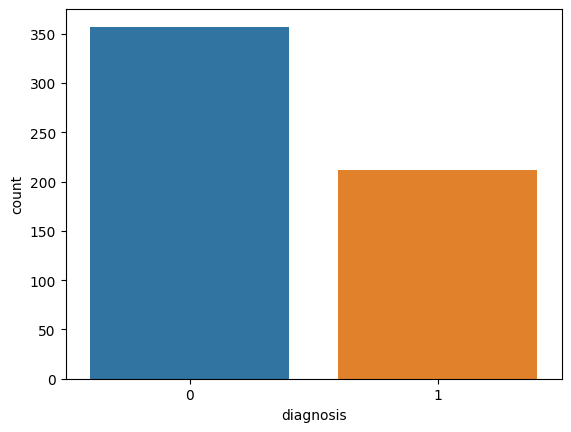

In [22]:
sns.countplot(data=df,x='diagnosis')

In [26]:
df.corr()[['diagnosis']].sort_values(by='diagnosis',ascending=False).T

,diagnosis,concave points_worst,perimeter_worst,concave points_mean,radius_worst,perimeter_mean,area_worst,radius_mean,area_mean,concavity_mean,...,smoothness_mean,symmetry_mean,fractal_dimension_worst,compactness_se,concavity_se,fractal_dimension_se,symmetry_se,texture_se,fractal_dimension_mean,smoothness_se
diagnosis,1.0,0.793566,0.782914,0.776614,0.776454,0.742636,0.733825,0.730029,0.708984,0.69636,...,0.35856,0.330499,0.323872,0.292999,0.25373,0.077972,-0.006522,-0.008303,-0.012838,-0.067016


c:\Users\Beethoven\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Beethoven\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='perimeter_worst', ylabel='diagnosis'>

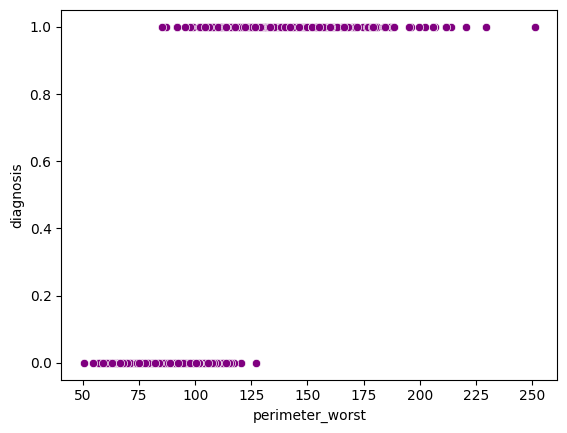

In [28]:
sns.scatterplot(data=df,x='perimeter_worst',y='diagnosis',color='purple')

<div class="alert alert-danger" role="alert"> 
🔎 Seperate X & Y

In [29]:
X = df.drop('diagnosis',axis=1)
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [31]:
Y = df['diagnosis']
Y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

<div class="alert alert-danger" role="alert"> 
🔎 Split train and test features

In [32]:
x_train , x_test , y_train , y_test = train_test_split(X,Y,test_size=0.3,random_state=101)

In [33]:
scaler = StandardScaler()
scaler

StandardScaler()

In [34]:
scaler.fit(x_train)

StandardScaler()

In [35]:
x_train_s = scaler.fit_transform(x_train)
x_train_s

array([[-0.28192196,  0.66174195, -0.37431608, ..., -1.57163052,
        -0.987646  , -1.43016122],
       [ 0.18650131, -1.22186345,  0.28233605, ..., -0.05396602,
        -0.13691022,  0.38685223],
       [ 0.19207778,  0.51772843,  0.17417681, ...,  1.03113696,
         1.25592976,  1.32208767],
       ...,
       [ 0.57127757,  0.07425823,  0.52052941, ...,  0.56182245,
        -0.41995577, -1.13641521],
       [ 1.32410067,  0.48115357,  1.28210004, ...,  1.35098825,
         1.22554634,  0.7443152 ],
       [-0.08674559, -0.14747687, -0.10209509, ...,  0.20908924,
        -0.10172941,  0.29127678]])

In [36]:
x_test_s = scaler.fit_transform(x_test)
x_test_s

array([[-0.60124109, -0.16227387, -0.63030822, ..., -0.48860332,
         0.18304721, -0.59005498],
       [-0.09981413, -0.78507772, -0.16636076, ..., -0.64630781,
        -0.24687596, -0.56066727],
       [-0.43708345, -0.69992876, -0.47867451, ..., -0.52161124,
         0.25136833, -0.73159578],
       ...,
       [-1.22802478, -1.69982089, -1.2015193 , ..., -0.76701792,
         0.10639424, -0.26798967],
       [ 0.29714888,  0.86437937,  0.28250948, ...,  0.51885568,
        -0.5284923 , -0.80416543],
       [-0.78032214, -0.25958697, -0.80305003, ..., -0.69302916,
        -1.49165351, -0.75198726]])

<div class="alert alert-danger" role="alert"> 
🔎 LogisticRegression

In [37]:
model = LogisticRegression()
model

LogisticRegression()

In [39]:
model.fit(x_train_s,y_train)

LogisticRegression()

In [41]:
coefficient = model.coef_
coefficient

array([[ 0.49497163,  0.23501913,  0.44863542,  0.49781489, -0.03973334,
        -0.30709314,  0.70472306,  0.90423871,  0.31447805, -0.48508873,
         0.82344804, -0.2786648 ,  0.317364  ,  0.73040569,  0.05960469,
        -0.59158081, -0.00862051,  0.00800307, -0.05239891, -0.66159428,
         1.0914887 ,  1.44266415,  0.80883559,  0.94917078,  0.92433461,
        -0.01790473,  0.65863866,  0.99092263,  0.59543633,  0.40438504]])

<div class="alert alert-danger" role="alert"> 
🔎 Prediction

In [44]:
y_predict = model.predict(x_test_s)
y_predict

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

In [45]:
y_test

107    0
437    0
195    0
141    1
319    0
      ..
420    0
279    0
390    0
91     1
297    1
Name: diagnosis, Length: 171, dtype: int64

In [47]:
y_test.value_counts()

diagnosis
0    105
1     66
Name: count, dtype: int64

In [54]:
y_predict_df = pd.DataFrame(y_predict)
y_predict_df.value_counts()

0    108
1     63
Name: count, dtype: int64

<div class="alert alert-danger" role="alert"> 
🔎 Evaluating the model

In [55]:
accuracy_score(y_test,y_predict)

0.9824561403508771

In [56]:
confusion_matrix(y_test,y_predict)

array([[105,   0],
       [  3,  63]], dtype=int64)

In [57]:
print(classification_report(y_predict,y_test))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       108
           1       0.95      1.00      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.99      0.98       171
weighted avg       0.98      0.98      0.98       171

